## Importing necessary modules and loading the dataset

In [21]:
# Import necessary modules
import data_preprocessor as dp
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
# 1. Load the dataset
messy_data = pd.read_csv('../Data/messy_data.csv')
clean_data = messy_data.copy()


## Display dataset information

#2. Now explore the data set using various methods to get basic information about the dataset. 

Here I used messy_data.head() to observe the first 5 rows in order to get a sense of what the data looks like. I used messy_data.info() to be able to see an overview of the number of columns, non-null counts for each column, and data types of each column. Lastly, I used messy_data.describe() to be able to get an overview of summary statistics including mean, standard deviation, minimum, maximum, and more. 

In [22]:
messy_data.head()

target               a         b   c                  d          e  \
0     0.0  lv hypertrophy  0.531368  63       fixed defect  Cleveland   
1     1.0  lv hypertrophy -1.056253  67             normal  Cleveland   
2     1.0  lv hypertrophy  0.438407  67  reversable defect  Cleveland   
3     0.0          normal -1.413430  37             normal  Cleveland   
4     0.0  lv hypertrophy -1.347216  41             normal  Cleveland   

          f                g      h      i  ...          r       s    t  \
0  0.285812   typical angina  233.0   True  ...  60.627689    Male  2.3   
1  1.660947     asymptomatic  286.0  False  ...  65.225088    Male  1.5   
2 -0.305235     asymptomatic  229.0  False  ...  66.956699    Male  2.6   
3  0.887054      non-anginal  250.0  False  ...  37.160246    Male  3.5   
4 -0.558037  atypical angina  204.0  False  ...  41.359067  Female  1.4   

           u      v         w    x          y   z      {  
0  62.306825  145.0 -1.007833  0.0  61.730527 NaN  False  
1        NaN  160.0  0.097395  3.0  66.310181 NaN   True  
2  65.493594  120.0       NaN  2.0  66.005086 NaN   True  
3  38.824367  130.0 -1.291802  0.0  37.473600 NaN  False  
4        NaN  130.0  0.585360  0.0  41.363575 NaN  False  

[5 rows x 28 columns]

In [23]:
messy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  920 non-null    float64
 1   a       1193 non-null   object 
 2   b       1196 non-null   float64
 3   c       1196 non-null   int64  
 4   d       561 non-null    object 
 5   e       1196 non-null   object 
 6   f       1196 non-null   float64
 7   g       1196 non-null   object 
 8   h       1158 non-null   float64
 9   i       1087 non-null   object 
 10  j       591 non-null    float64
 11  k       1196 non-null   float64
 12  l       1196 non-null   float64
 13  m       778 non-null    object 
 14  n       1012 non-null   float64
 15  o       1008 non-null   float64
 16  p       1122 non-null   float64
 17  q       1009 non-null   float64
 18  r       1196 non-null   float64
 19  s       1196 non-null   object 
 20  t       1110 non-null   float64
 21  u       1079 non-null   float64
 22  

In [24]:
messy_data.describe()

target            b            c            f            h  \
count  920.000000  1196.000000  1196.000000  1196.000000  1158.000000   
mean     0.553261     0.004015    53.383779     0.001391   200.583765   
std      0.497426     0.984837     9.534033     1.011656   110.061582   
min      0.000000    -3.308750    28.000000    -2.820047     0.000000   
25%      0.000000    -0.692960    47.000000    -0.633350   176.250000   
50%      1.000000     0.004241    54.000000    -0.051965   224.000000   
75%      1.000000     0.714572    60.000000     0.693539   270.000000   
max      1.000000     2.982511    77.000000     3.323155   603.000000   

                j            k            l            n            o  \
count  591.000000  1196.000000  1196.000000  1012.000000  1008.000000   
mean    -0.600216     0.007269    -0.013268     4.904847   137.780754   
std      1.067309     2.498874     0.958741     0.200283    26.175380   
min     -5.954661   -24.268796    -2.802329     4.094345    60.000000   
25%     -1.113061    -0.722036    -0.636907     4.787492   120.000000   
50%     -0.324872     0.002258    -0.000074     4.941642   140.000000   
75%      0.136188     0.699648     0.642745     5.062595   157.000000   
max      1.369476    27.315031     3.328148     5.273000   202.000000   

                 p            q            r            t            u  \
count  1122.000000  1009.000000  1196.000000  1110.000000  1079.000000   
mean    137.660298   137.259233    53.376221     0.872252    53.328760   
std      25.890960    25.790053     9.603964     1.077211     9.645423   
min      60.522848    60.035804    27.548190    -2.600000    28.743286   
25%     119.742012   119.041270    46.857255     0.000000    46.541317   
50%     139.676137   139.602369    54.126896     0.500000    54.148423   
75%     157.382495   156.970305    60.324072     1.500000    60.418600   
max     200.680509   202.572685    77.484697     6.200000    78.520864   

                 v            w           x            y           z  
count  1116.000000  1079.000000  397.000000  1196.000000  598.000000  
mean    132.247312     0.034028    0.667506    53.379991   -0.757779  
std      18.872281     0.995701    0.924021     9.564497    1.257376  
min       0.000000    -3.087673    0.000000    26.549257   -7.293222  
25%     120.000000    -0.601836    0.000000    46.931375   -1.316941  
50%     130.000000     0.035589    0.000000    54.448992   -0.439484  
75%     140.000000     0.723486    1.000000    59.812460    0.094453  
max     200.000000     3.933288    3.000000    79.712348    1.202416

## Identifying issues

#3 From exploring the data find some of the underlying issues.

From this exploration the structure of the data is a dataframe where there are 1196 rows and 28 columns.
From a first glance I can see some issues including several columns having null values: target, a, d, h, i, j, m, n, o, p, q, r, t, u, v, w, x, z, {.
It can be seen that some columns are categorical (a, d, e, g, i, m, s, {) and some are integer (c) but the rest are floats therefore the data types are not uniform which can be an issue in certain scenarios.
From this information I am not easily able to tell if there are outliers or redundant information so I will need to visualize the data or further analyze the data for this.

## Visualization


#4 Use visualization to help you deeper explore the data set.

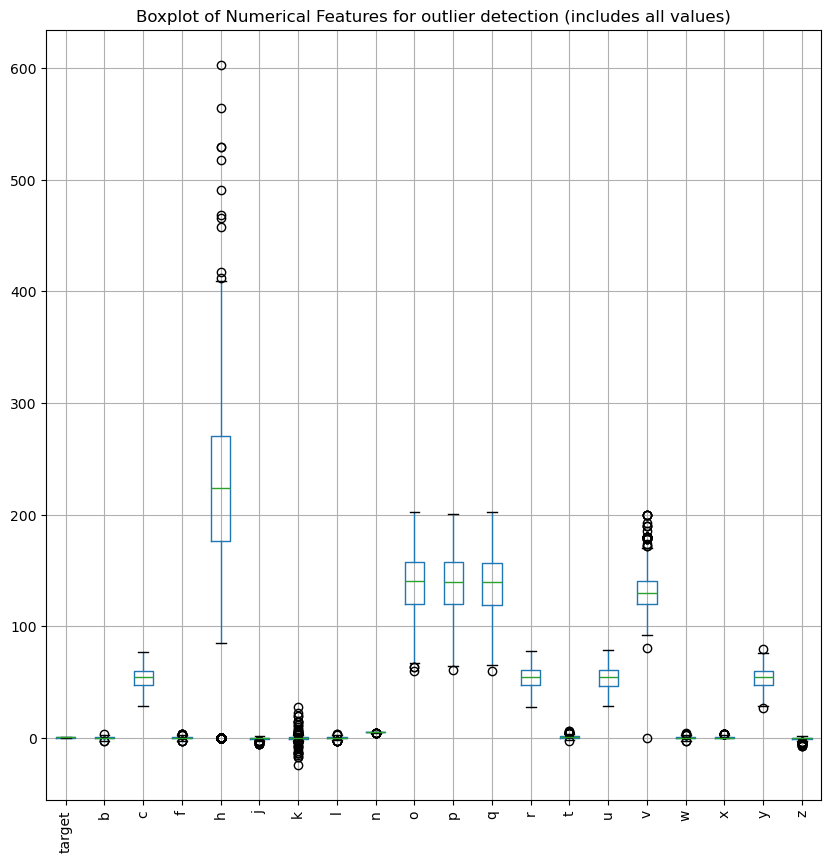

In [25]:
# Visualization of Outliers for numerical values using boxplots
# Boxplot 1/3

# Selecting numerical columns only
numeric_columns = messy_data.select_dtypes(include=['int64', 'float64',]).columns

# Plot boxplots for all numerical features
plt.figure(figsize=(10, 10))
messy_data[numeric_columns].boxplot(rot=90)
plt.title("Boxplot of Numerical Features for outlier detection (includes all values)")
plt.show()

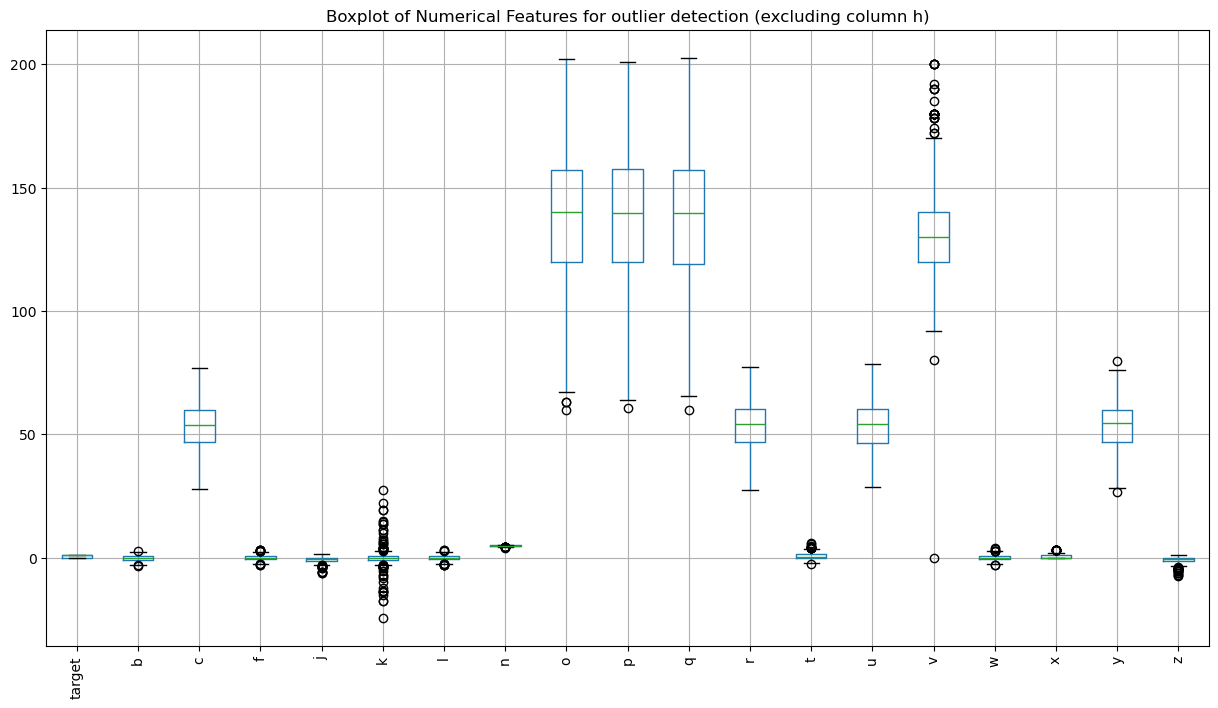

In [6]:
# Visualization of Outliers for numerical values closer inspection (without column 'h')
# Boxplot 2/3
# Select numerical columns
numeric_columns = messy_data.select_dtypes(include=['int64', 'float64']).columns

# Omit column 'h' from the list of numeric columns
numeric_columns = numeric_columns.drop('h')

# Plot boxplots for all numerical features except 'h'
plt.figure(figsize=(15, 8))
messy_data[numeric_columns].boxplot(rot=90)  # Rotate labels for readability
plt.title("Boxplot of Numerical Features for outlier detection (excluding column h)")
plt.show()


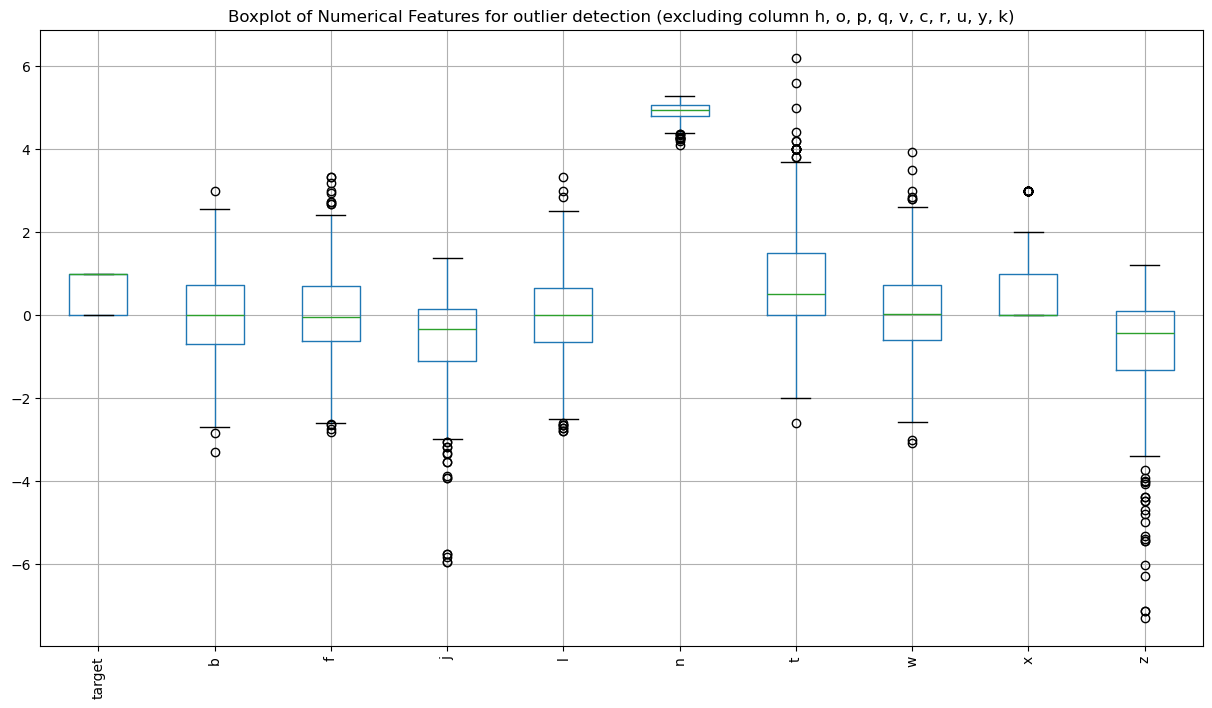

In [7]:
# Visualization of Outliers for numerical values closer inspection (without columns 'h','o', 'p', 'q', 'v', 'c', 'r', 'u', 'y', 'k')
# Boxplot 2/3
# Select numerical columns
numeric_columns = messy_data.select_dtypes(include=['int64', 'float64']).columns

# Omit listed columns from the list of numeric columns
numeric_columns = numeric_columns.drop('h')
numeric_columns = numeric_columns.drop('o')
numeric_columns = numeric_columns.drop('p')
numeric_columns = numeric_columns.drop('q')
numeric_columns = numeric_columns.drop('v')
numeric_columns = numeric_columns.drop('c')
numeric_columns = numeric_columns.drop('r')
numeric_columns = numeric_columns.drop('u')
numeric_columns = numeric_columns.drop('y')
numeric_columns = numeric_columns.drop('k')

# Plot boxplots for all numerical features except those listed
plt.figure(figsize=(15, 8))
messy_data[numeric_columns].boxplot(rot=90)  # Rotate labels for readability
plt.title("Boxplot of Numerical Features for outlier detection (excluding column h, o, p, q, v, c, r, u, y, k)")
plt.show()


In these box plots what we can observe are the outliers for each column. With this type of plot we can also observe the interquartile range which is shown as the box where the bottom of the box indicates Q1 and the top indicates Q3 and the line in the center indicates median. The median line in the box will show skewness meaning if the line is located closer to the top that column is skewed negatively and if the line is closer to the bottom that column is skewed positively. Moreover, the box length indicates sample variability.

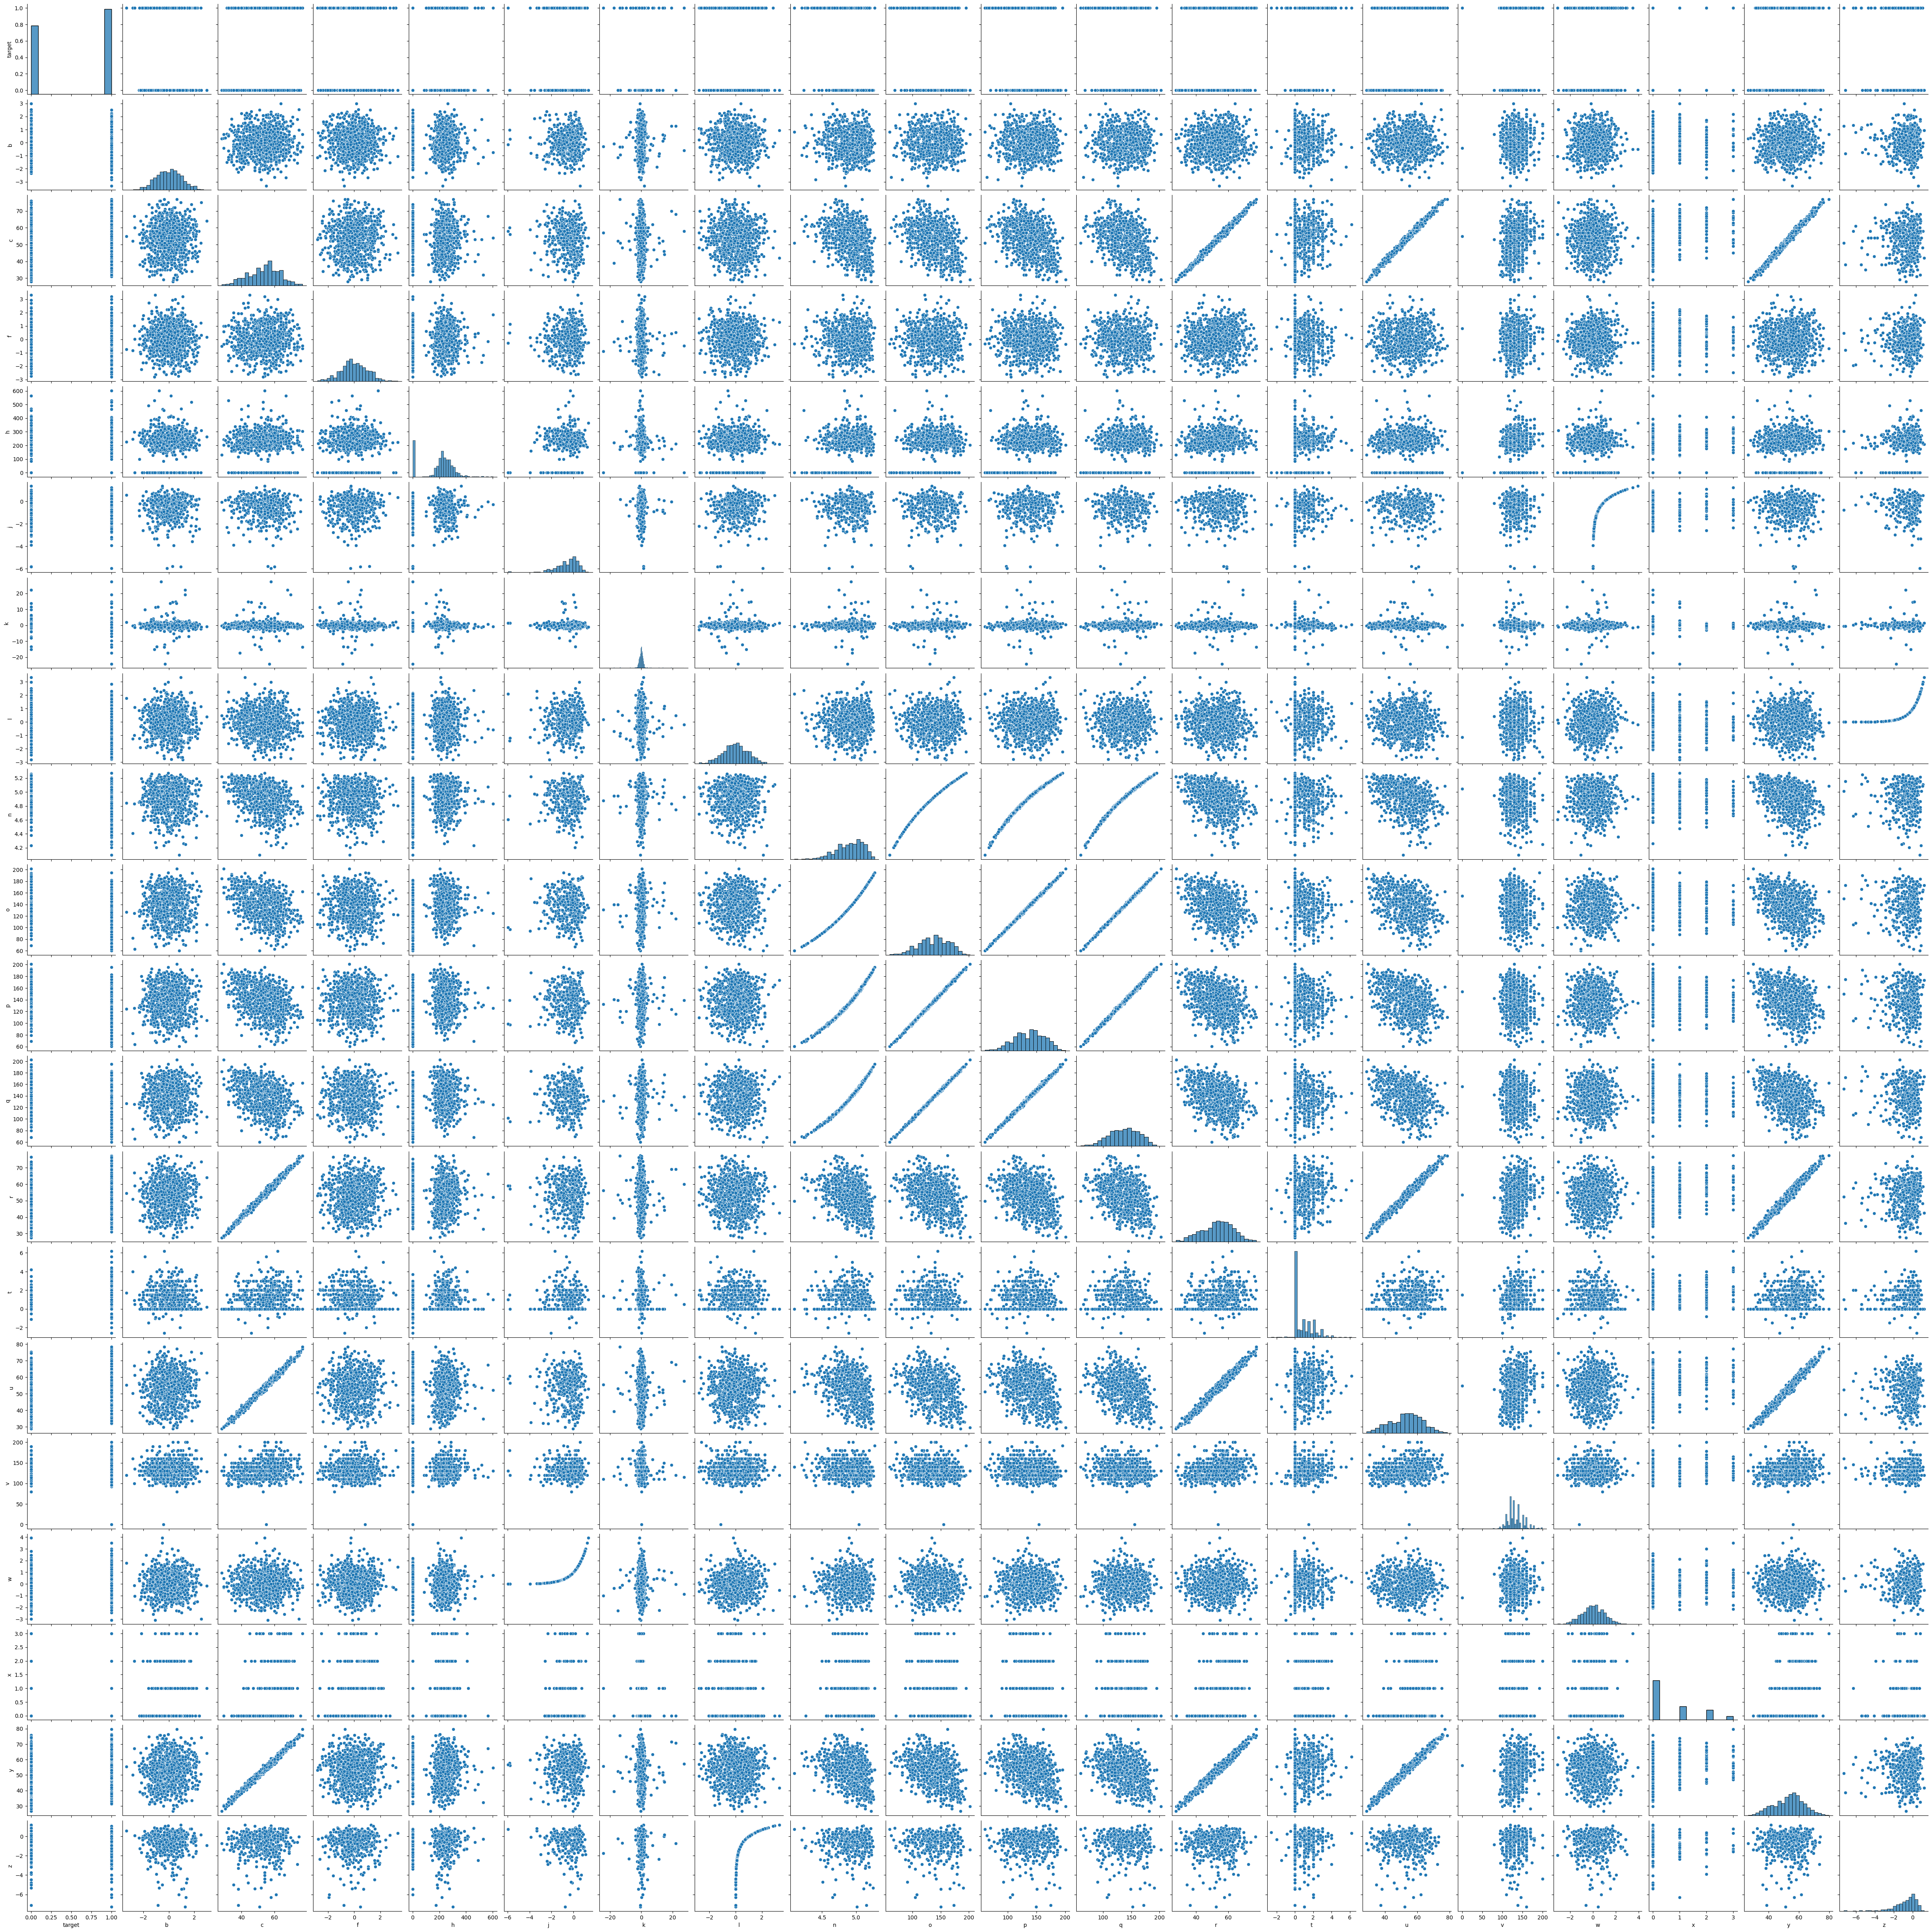

In [8]:
# Pairplot 
# Select numerical columns
numeric_columns = messy_data.select_dtypes(include=['int64', 'float64']).columns

# Plot pairplot for all numerical values 
sns.pairplot(messy_data[numeric_columns])
plt.show()

Pairplots are useful for visualizing relationships between multiple numerical variables in a data set. We can observe a mix of scatterplots for the possible variable pairs and histograms for individual variables along the diagonal. In the scatter plots we can see clear linear relationships for some of the pairs which indicates strong coorelations. If there are cloud like scatterplots this indicates no correlation. If distinct points are seen far from the main cluster then these are potential outliers. The diagonal histograms show the distribution patterns of individual features. Some apprear to have a normal distribution while others are skewed or are made of discrete values.

## Accuracy test on messy data

In [9]:
dp.simple_model(messy_data)

Accuracy: 0.8


## Preprocessing the data

#5 Preprocess the data by using the data_preprocessor.py functions

In [14]:
# Impute missing values
# You can choose to use any strategy however, if you want to see the accuracy of the model on cleaned data you cannot use mean as the target column should only have values of 1 or 0 not anything inbetween.

# clean_data = dp.impute_missing_values(clean_data, strategy='mean')
# clean_data = dp.impute_missing_values(clean_data, strategy='mode')
clean_data = dp.impute_missing_values(clean_data, strategy='median')

In [15]:
# Remove duplicates
clean_data = dp.remove_duplicates(clean_data)

In [16]:
# Normalize data
clean_data = dp.normalize_data(clean_data, method='minmax')

In [17]:
# Remove redundant features
clean_data = dp.remove_redundant_features(clean_data)

In [14]:
# 3. Save the cleaned dataset
clean_data.to_csv('../Data/clean_data.csv', index=False)

## Display Clean Dataset information

In [ ]:
clean_data.head()

In [18]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  1040 non-null   float64
 1   a       1038 non-null   object 
 2   b       1040 non-null   float64
 3   c       1040 non-null   float64
 4   d       479 non-null    object 
 5   e       1040 non-null   object 
 6   f       1040 non-null   float64
 7   g       1040 non-null   object 
 8   h       1040 non-null   float64
 9   i       949 non-null    object 
 10  j       1040 non-null   float64
 11  k       1040 non-null   float64
 12  l       1040 non-null   float64
 13  m       663 non-null    object 
 14  n       1040 non-null   float64
 15  s       1040 non-null   object 
 16  t       1040 non-null   float64
 17  v       1040 non-null   float64
 18  w       1040 non-null   float64
 19  x       1040 non-null   float64
 20  z       1040 non-null   float64
 21  {       980 non-null    object 
dtype

In [19]:
clean_data.describe()

target            b            c            f            h  \
count  1040.000000  1040.000000  1040.000000  1040.000000  1040.000000   
mean      0.604808     0.524873     0.509596     0.457141     0.338080   
std       0.489127     0.156174     0.193478     0.165309     0.174315   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.414449     0.367347     0.354097     0.305141   
50%       1.000000     0.521703     0.530612     0.450274     0.371476   
75%       1.000000     0.638722     0.653061     0.566785     0.442786   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 j            k            l            n            t  \
count  1040.000000  1040.000000  1040.000000  1040.000000  1040.000000   
mean      0.750237     0.471048     0.456361     0.699311     0.386429   
std       0.101908     0.048138     0.156502     0.156206     0.117286   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.768356     0.456648     0.354543     0.609033     0.295455   
50%       0.768662     0.470585     0.457463     0.718868     0.352273   
75%       0.768662     0.483892     0.563349     0.805223     0.465909   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 v            w            x            z  
count  1040.000000  1040.000000  1040.000000  1040.000000  
mean      0.659260     0.443474     0.069872     0.788118  
std       0.090908     0.134372     0.201137     0.107137  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.600000     0.364875     0.000000     0.805565  
50%       0.650000     0.444848     0.000000     0.806736  
75%       0.700000     0.522899     0.000000     0.807987  
max       1.000000     1.000000     1.000000     1.000000

## Accuracy Test on clean data

In [11]:
# 4. Train and evaluate the model
dp.simple_model(clean_data)

Accuracy: 0.7469879518072289
